<a href="https://colab.research.google.com/github/ArduousBrain/Deep-Learning-PS/blob/master/Gradients_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

X = [2,3,4,5,6,7,8,9,10]
Y = [4,9,16,25,36,49,64,81,100]

def f(w,b,x): #sigmoid function/ f(x)
  return 1.0/(1 + np.exp(-(w*x + b)))

def err(w,b):
  err = 0
  for x,y in zip(X,Y):
    fx = f(w,b,x)
    err += 0.5 * (fx - y)**2
  return err

def grad_w(w,b,x,y):
  fx = f(w,b,x)
  return (fx - y)* fx * (1-fx) * x

def grad_b(w,b,x,y):
  fx = f(w,b,x)
  return (fx - y)* fx * (1-fx) 

def do_grad_descent():
  w,b,eta,max_epoch = -2,-2,1,10000
  for i in range(max_epoch):
    dw, db = 0,0
    for x,y in zip(X,Y):
      dw += grad_w(w,b,x,y)
      db += grad_b(w,b,x,y)
    w = w - eta * dw
    b = b - eta * db
    error = err(w,b)

  print('weights: ', w, 'Bias: ', b)
  print('Error: ', error)

def do_momentum_gradient_descent (init_w , init_b ,max_epochs) :
   w , b , eta = init_w , init_b , 1.0
   prev_v_w , prev_v_b , gamma = 0 , 0 , 0.9
   for i in range ( max_epochs ) :
        dw , db = 0 , 0
        for x , y in zip ( X , Y ) :
            dw + grad_w ( w , b , x , y )
            db += grad_b ( w , b , x , y )
        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db
        w = w - v_w
        b = b - v_b
        prev_v_w = v_w
        prev_v_b = v_b
        
def do_nesterov_accelerated_gradient_descent (init_w , init_b, max_epochs) :
   w , b , eta = init_w , init_b, 1.0
   prev_v_w , prev_v_b , gamma = 0 , 0 , 0.9
   for i in range ( max_epochs ) :
       dw , db = 0 , 0
       #do partial updates
       v_w = gamma * prev_v_w
       v_b = gamma * prev_v_b
       for x , y in zip ( X , Y ) :
           #calculate gradients after partial update
           dw += grad_w (w - v_w , b - v_b , x , y )

           db += grad_b (w  - v_w , b - v_b , x , y )

      
       #now do the full update
       v_w = gamma * prev_v_w + eta * dw
       v_b = gamma * prev_v_b + eta * db
       
       w = w - v_w
       b = b - v_b
       prev_v_w = v_w
       prev_v_b = v_b

weights:  5.607360669301079 Bias:  0.7319774337026114
Error:  12286.500019633295


In [ ]:
def prediction(w,b,x):
  fx = f(w,b,x)
  return fx

print(prediction(5.607360669301079, 0.7319774337026114, 5))

0.9999999999996794


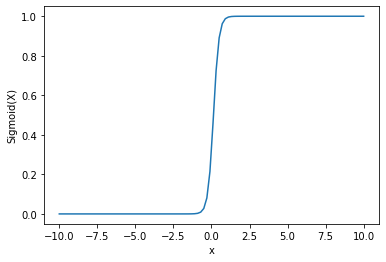

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

w = 5.607360669301079
b = 0.7319774337026114
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-w*x + b))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()